#  Jupyter Notebook for Cab fare Prediction

In [40]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

In [41]:
#Setting the working directory

os.chdir("D:/edWisor/edwisorproject/pythonproject")
print(os.getcwd())

D:\edWisor\edwisorproject\pythonproject


The details of data attributes in the dataset are as follows:
-  pickup_datetime - timestamp value indicating when the cab ride started.
-  pickup_longitude - float for longitude coordinate of where the cab ride started.
-  pickup_latitude - float for latitude coordinate of where the cab ride started.
-  dropoff_longitude - float for longitude coordinate of where the cab ride ended.
-  dropoff_latitude - float for latitude coordinate of where the cab ride ended.
-  passenger_count - an integer indicating the number of passengers in the cab ride.

predictive modeling machine learning project can be broken down into below workflow: 
1. Prepare Problem 
a) Load libraries b) Load dataset 
2. Summarize Data a) Descriptive statistics b) Data visualizations 
3. Prepare Data a) Data Cleaning b) Feature Selection c) Data Transforms 
4. Evaluate Algorithms a) Split-out validation dataset b) Test options and evaluation metric c) Spot Check Algorithms d) Compare Algorithms 
5. Improve Accuracy a) Algorithm Tuning b) Ensembles 
6. Finalize Model a) Predictions on validation dataset b) Create standalone model on entire training dataset c) Save model for later use

In [42]:
#Since one of values in pickup_datetime column is 43  so replacing it by NAN 
#Loading the data:
#train  = pd.read_csv("train_cab.csv")
# making data frame from csv file 
train = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})

test   = pd.read_csv("test.csv")


In [43]:
#understanding data
#train.head() 
#checking first five rows of the training dataset
print(train)

      fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0             4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1            16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2             5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3             7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4             5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   
...           ...                      ...               ...              ...   
16062         6.5  2014-12-12 07:41:00 UTC        -74.008820        40.718757   
16063        16.1  2009-07-13 07:58:00 UTC        -73.981310        40.781695   
16064         8.5  2009-11-11 11:19:07 UTC        -73.972507        40.753417   
16065         8.1  2010-05-11 23:53:00 UTC        -73.957027        40.765945   
16066         8.5  2011-12-14 06:24:33 UTC        -74.002111        40.729755   

       dropoff_longitude  d

In [44]:
print("shape of training data is: ",train.shape) 
#checking the number of rows and columns in training data
print("shape of test data is: ",test.shape) 
#checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [45]:
#checking the data-types in training dataset
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [46]:
#checking the data-types in test dataset
test.dtypes   

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [47]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [48]:
train.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [49]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data cleaning and missing value analysis

In [50]:
# Convert fare_amount from object to numeric
# Using errors=’coerce’. It will replace all non-numeric values with NaN.
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce") 


In [51]:
# Checking the data-types in training dataset
train.dtypes 


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [52]:
train.shape

(16067, 7)

In [53]:
train['pickup_datetime'].isnull().sum()

1

In [54]:
# There is only one row which is having NAN in pickup_datetime column so delete it.
# Removing pickup_datetime missing values rows

# Dropping NA values in datetime column
train=train.dropna(subset= ["pickup_datetime"])
#train["pickup_datetime"].dropna(axis = 0, how ='any')  

In [55]:
train['pickup_datetime'].isnull().sum()

0

In [56]:
train.shape

(16066, 7)

In [57]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [58]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [59]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [60]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [61]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [62]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
####Series.dt qualifier can be used to access the values of the series as datetimelike and return several properties. 

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [63]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
####Series.dt qualifier can be used to access the values of the series as datetimelike and return several properties. 

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [64]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [65]:
train.dtypes 
#Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

# Observations:
-  point1:  An outlier value of 43 in pickup_datetime.
- point 2: passenger count shouldnot exceed than 6(even for SUV).    
- point 3: Latitudes range from -90 to +90 and Longitudes range from -180 to 180.
- point 4: Very few missing values and high values of fare and passenger_count are present so decided to remove them.

In [66]:
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [68]:
print(test.shape)
print(test['pickup_datetime'].isnull().sum())

(9914, 12)
0


## Now there is no NAN values with respect to pickup_datetime column

In [69]:
# checking the passenger count value
train["passenger_count"].describe()


count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [70]:
#we see max value of passenger_count is 5345 which is actually not feasible so reducing it to 6
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [71]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [72]:
train["passenger_count"].sort_values(ascending= True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [73]:
#removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [75]:
#There is one passenger count value of 0.12 which is not possible. Hence we will remove fractional passenger value
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(15933, 13)

In [76]:
#Now analyzing fare amount variable
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [77]:
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [78]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(15930, 13)

In [79]:
##make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.0

In [80]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15928, 13)

In [81]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15926, 13)

In [82]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [83]:
train["fare_amount"].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [ ]:
#now checking the latitude andlongitude
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above


In [84]:
#Hence dropping the values
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [86]:
#Hence dropping the values
train = train.drop((train[train['pickup_longitude']<-180]).index, axis=0)
train = train.drop((train[train['pickup_longitude']>180]).index, axis=0)

In [87]:
#Hence dropping the values
train = train.drop((train[train['dropoff_latitude']<-90]).index, axis=0)
train = train.drop((train[train['dropoff_latitude']>90]).index, axis=0)
#Hence dropping the values
train = train.drop((train[train['dropoff_longitude']<-180]).index, axis=0)
train = train.drop((train[train['dropoff_longitude']>180]).index, axis=0)


In [88]:
train.shape

(15901, 13)

In [89]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [90]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [91]:
#now we cleaned our both datasets and do further operations

In [92]:
#calculating distance between coordinates
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [93]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [94]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [96]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [97]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [98]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [211]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [99]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
13050       0.000000
11593       0.000000
2346        0.000000
8331        0.000000
1637        0.000000
Name: distance, Length: 15901, dtype: float64

In [100]:
train["distance"].describe()

count    15901.000000
mean        15.071717
std        311.742181
min          0.000000
25%          1.215839
50%          2.125955
75%          3.851353
max       8667.542104
Name: distance, dtype: float64

In [101]:
train["distance"].sort_values(ascending=False).head(25)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
Name: distance, dtype: float64

In [ ]:
As we can see that top 23 values in the distance variables are very high It means more than 1000 Kms distance they have travelled
Also just after 23rd value from the top, the distance goes down to 129, which means these values are showing some outliers
We need to remove these outliers.


In [102]:
Counter(train['distance'] == 0)

Counter({False: 15447, True: 454})

In [103]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [104]:
Counter(train['fare_amount'] == 0)

Counter({False: 15901})

In [105]:
###we will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15447, 14)

In [106]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15424, 14)

In [107]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [ ]:
###Now we have splitted the pickup_datetime variable into different varaibles like month, year, day etc so now we dont 
## need to have that pickup_datetime variable now. Hence we can drop that, Also we have created distance using pickup and 
##drop longitudes and latitudes so we can  also drop pickup and drop longitudes and latitudes variables.


In [108]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)
test=test.drop(drop,axis=1)

In [109]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [110]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [111]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [112]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['year'] = test['year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [113]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [114]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [115]:
test.describe()

,passenger_count,year,Month,Date,Day,Hour,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.435371
std,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.972374
min,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.298277
50%,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.217412
75%,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.045302
max,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.996040


In [116]:
test.head(5)

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [306]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [307]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# DATA VISUALIZATION
## VisuaLISE of following:

- 1. Number of Passengers effects the the fare
- 2. Pickup date and time effects the fare
- 3. Day of the week does effects the fare
- 4. Distance effects the fare

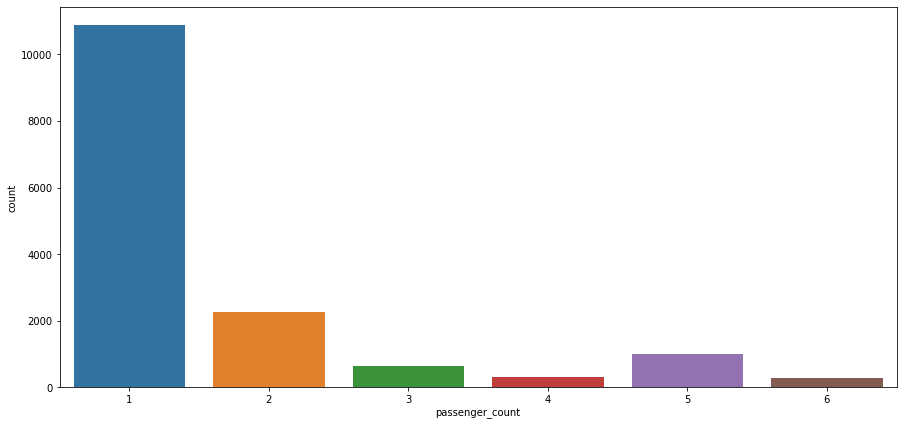

In [123]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)
plt.savefig('Figures/passengercount.png')
plt.savefig('Figures/passengercount.pdf')
plt.savefig('Figures/passengercount.jpg')
plt.savefig('Figures/passengercount.eps')

In [124]:
train['passenger_count'].describe()

count    15424.000000
mean         1.651906
std          1.267658
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [125]:
Counter(train["passenger_count"])

Counter({1: 10882, 2: 2260, 3: 655, 6: 294, 5: 1016, 4: 317})

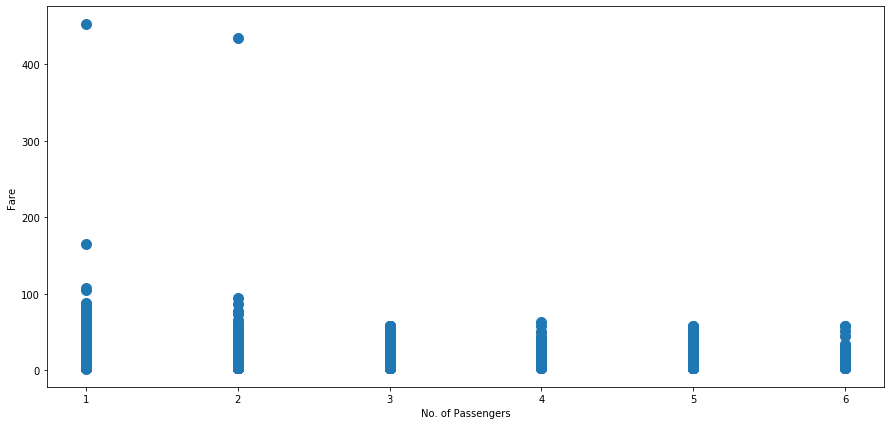

<Figure size 432x288 with 0 Axes>

In [126]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=100)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()
plt.savefig('Figures/Numberofpassengerandfare.png')
plt.savefig('Figures/Numberofpassengerandfare.pdf')
plt.savefig('Figures/Numberofpassengerandfare.jpg')
plt.savefig('Figures/Numberofpassengerandfare.eps')

# Observations :
# #  By seeing the above plots we can easily conclude that:
- 1. single travelling passengers are most frequent travellers.
- 2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

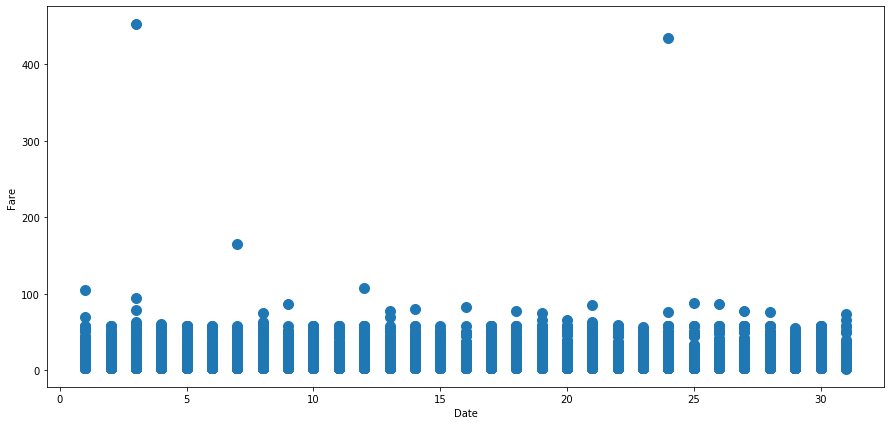

<Figure size 432x288 with 0 Axes>

In [127]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=100)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()
plt.savefig('Figures/dateandfare.eps')
plt.savefig('Figures/dateandfare.jpg')
plt.savefig('Figures/dateandfare.pdf')
plt.savefig('Figures/dateandfare.png')

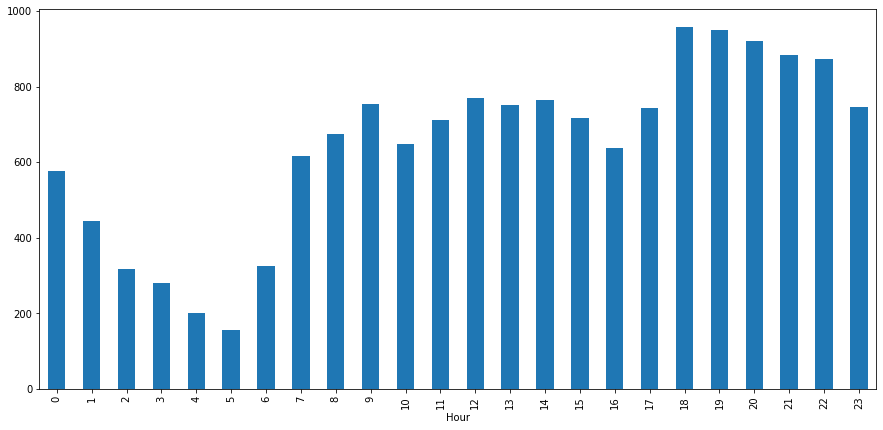

<Figure size 432x288 with 0 Axes>

In [128]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")

plt.show()
plt.savefig('Figures/hourcount.eps')
plt.savefig('Figures/hourcount.jpg')
plt.savefig('Figures/hourcount.pdf')
plt.savefig('Figures/hourcount.png')

#Analyzing above graph we can predict that Lowest cabs at 5 AM and highest at and around 7 PM to8 PM i.e the office rush hours

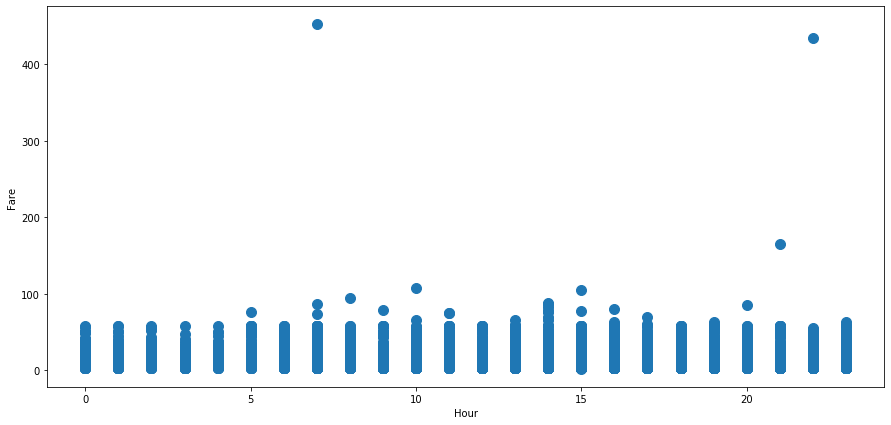

<Figure size 432x288 with 0 Axes>

In [129]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=100)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()
plt.savefig('Figures/timeandfare.eps')
plt.savefig('Figures/timeandfare.jpg')
plt.savefig('Figures/timeandfare.pdf')
plt.savefig('Figures/timeandfare.png')

##From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
#Hence we can assume that cabs taken early in morning and late at night are costliest


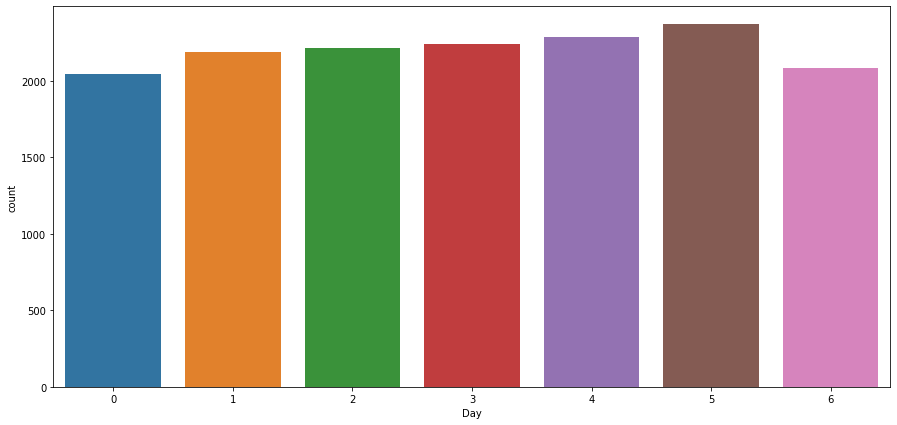

In [130]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)
plt.savefig('Figures/impactofdayonnumbercabride.eps')
plt.savefig('Figures/impactofdayonnumbercabride.jpg')
plt.savefig('Figures/impactofdayonnumbercabride.pdf')
plt.savefig('Figures/impactofdayonnumbercabride.png')

##Observation :
#The day of the week does not seem to have much influence on the number of cabs ride

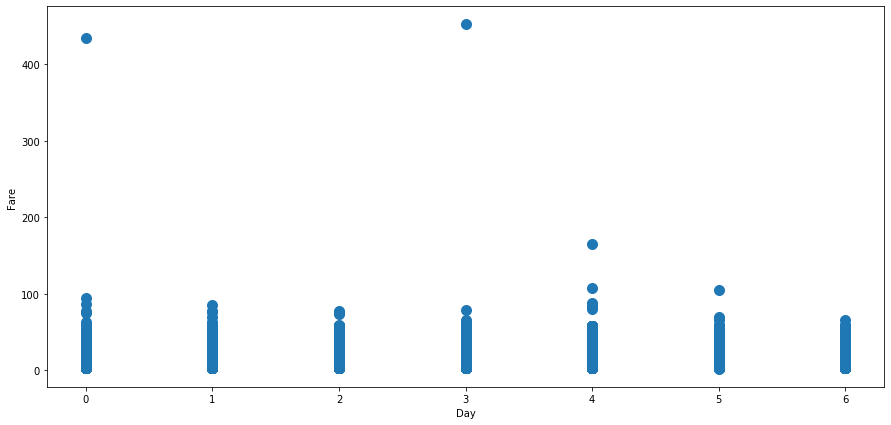

<Figure size 432x288 with 0 Axes>

In [131]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=100)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()
plt.savefig('Figures/impactofdayonfare.eps')
plt.savefig('Figures/impactofdayonfare.jpg')
plt.savefig('Figures/impactofdayonfare.pdf')
plt.savefig('Figures/impactofdayonfare.png')

# The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. 
## May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday 
### shows the high fare prices

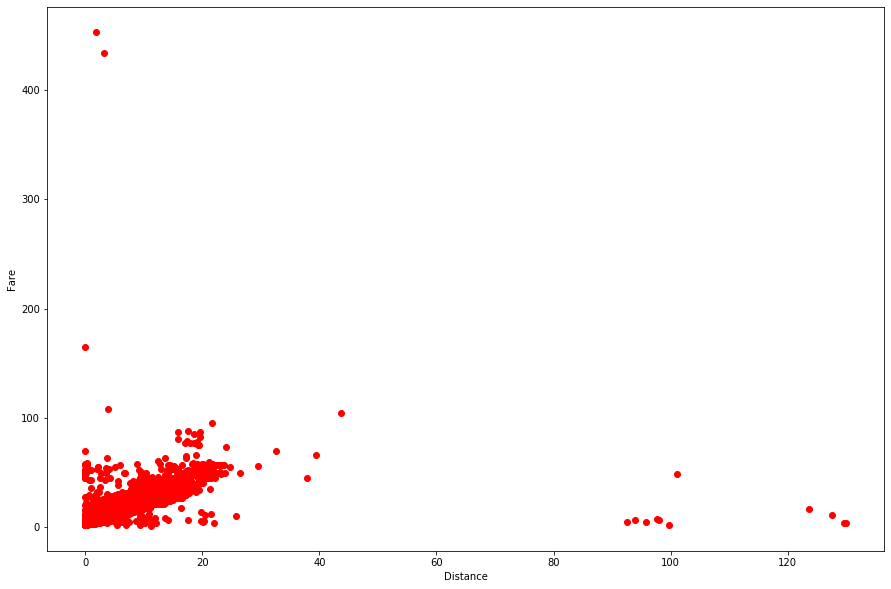

<Figure size 432x288 with 0 Axes>

In [132]:
#Relationship between distance and fare 
plt.figure(figsize=(15,10))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()
plt.savefig('Figures/distanceandfare.eps')
plt.savefig('Figures/distanceandfare.jpg')
plt.savefig('Figures/distanceandfare.pdf')
plt.savefig('Figures/distanceandfare.png')

##observation

It is quite obvious that distance will effect the amount of fare.

# Feature Scaling :

fare_amount


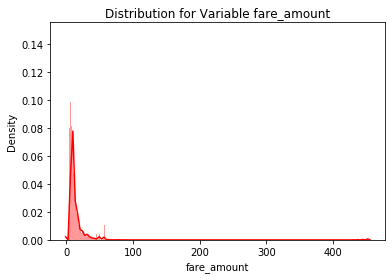

distance


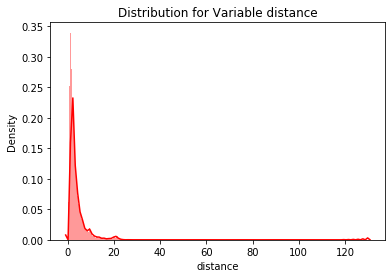

<Figure size 432x288 with 0 Axes>

In [133]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
    plt.savefig('Figures/featurescaling.eps')
plt.savefig('Figures/featurescaling.jpg')
plt.savefig('Figures/featurescaling.pdf')
plt.savefig('Figures/featurescaling.png')

In [109]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])



fare_amount


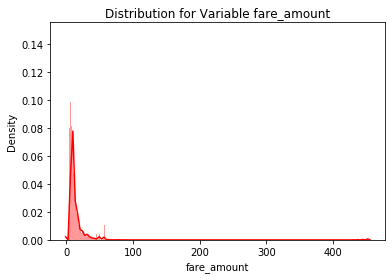

distance


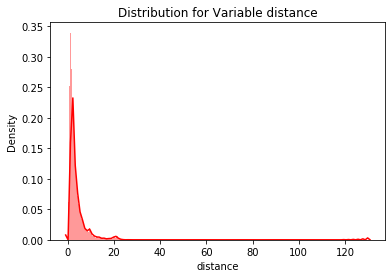

<Figure size 432x288 with 0 Axes>

In [134]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
    plt.savefig('Figures/correctedfeaturescaling.eps')
plt.savefig('Figures/correctedfeaturescaling.jpg')
plt.savefig('Figures/correctedfeaturescaling.pdf')
plt.savefig('Figures/correctedfeaturescaling.png')

In [318]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


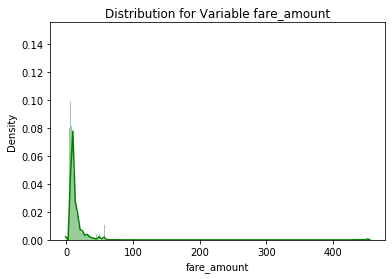

distance


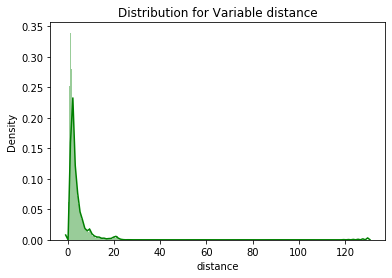

<Figure size 432x288 with 0 Axes>

In [135]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
    plt.savefig('Figures/finalfeaturescaling.eps')
plt.savefig('Figures/finalfeaturescaling.jpg')
plt.savefig('Figures/finalfeaturescaling.pdf')
plt.savefig('Figures/finalfeaturescaling.png')

In [ ]:
##Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, 
##we will use not use any  Feature Scalling technique. i.e, Normalization or 
##Standarization for our training data

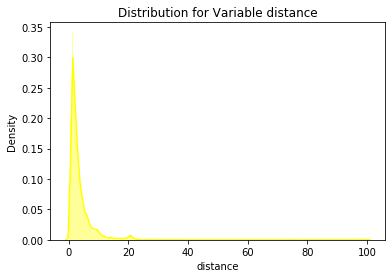

<Figure size 432x288 with 0 Axes>

In [136]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='yellow')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()
plt.savefig('Figures/testdistribution.eps')
plt.savefig('Figures/testdistribution.jpg')
plt.savefig('Figures/testdistribution.pdf')
plt.savefig('Figures/testdistribution.png')

In [137]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

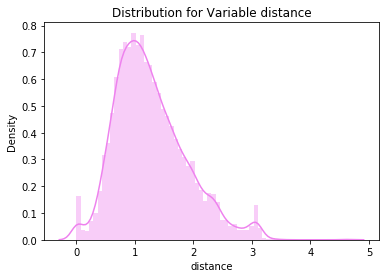

<Figure size 432x288 with 0 Axes>

In [138]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='violet')

plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()
plt.savefig('Figures/finaltestdistribution.eps')
plt.savefig('Figures/finaltestdistribution.jpg')
plt.savefig('Figures/finaltestdistribution.pdf')
plt.savefig('Figures/finaltestdistribution.png')

In [ ]:
#As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e,
#Normalization or Standarization for our test data

In [ ]:
# Applying ML ALgorithms:

In [143]:
##train test split for further modelling
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [144]:
x_train.head(5)

,passenger_count,year,Month,Date,Day,Hour,distance
7690,2,2012,5,16,2,6,4.426278
13018,1,2014,7,11,4,10,1.289265
12950,3,2009,6,27,5,17,1.666109
14009,1,2009,6,12,4,15,0.705864
2816,5,2013,5,18,5,20,2.130835


In [325]:
y_train.head(5)

7690      9.7
13018     6.5
12950     6.5
14009     4.1
2816     17.0
Name: fare_amount, dtype: float64

In [145]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


In [146]:
print(y_train.shape)
print(y_test.shape)

(12339,)
(3085,)


In [332]:
y_test.head()

1950      6.1
11386    19.5
9920     27.5
12161     3.5
13578    13.5
Name: fare_amount, dtype: float64

In [333]:
print(y_train.shape)
print(y_test.shape)

(12339,)
(3085,)


In [ ]:
### Linear Regression Model :

In [147]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(x_train , y_train)

In [148]:
#prediction on train data
pred_train_LR = fit_LR.predict(x_train)

In [149]:
#prediction on train data
pred_train_LR = fit_LR.predict(x_train)

In [151]:
#prediction on test data
pred_test_LR = fit_LR.predict(x_test)

In [152]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [153]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 8.991000490412132
Root Mean Squared Error For Test data = 5.332146690728373


In [154]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.34609748309146116

In [155]:
r2_score(y_test, pred_test_LR)

0.6209938297138382

#Decision Tree Model 

In [156]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [157]:
#prediction on train data
pred_train_DT = fit_DT.predict(x_train)

#prediction on test data
pred_test_DT = fit_DT.predict(x_test)

In [158]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [159]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 7.6015436393085505
Root Mean Squared Error For Test data = 4.504301201426906


In [160]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.5325872525943498

In [145]:
##RANDOM FOREST MODEL

In [161]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [162]:
#prediction on train data
pred_train_RF = fit_RF.predict(x_train)
#prediction on test data
pred_test_RF = fit_RF.predict(x_test)

In [163]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [165]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 2.7769420556081186
Root Mean Squared Error For Test data = 4.018911971699334


In [168]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9376221212629028

In [167]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7846925335365245

In [ ]:
###GRADIENT Boosting


In [169]:
fit_GB = GradientBoostingRegressor().fit(x_train, y_train)

In [170]:
#prediction on train data
pred_train_GB = fit_GB.predict(x_train)

#prediction on test data
pred_test_GB = fit_GB.predict(x_test)

In [171]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [172]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 5.885370347600376
Root Mean Squared Error For Test data = 3.65935685173374


In [173]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8214944888491861

In [174]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.7198152072614653

In [159]:
##OPTIMIZING THE RESULTS WITH PARAMETERS TUNING:

In [175]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
##Random Hyperparameter Grid

In [176]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [177]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())
# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(x_train,y_train)
predictions_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(x_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.73.
RMSE =  4.469299222774914


In [178]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [179]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(x_train,y_train)
predictions_gb = randomcv_gb.predict(x_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(x_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.78.
RMSE =  4.069712487003473


In [180]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(x_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 12}
R-squared = 0.8.
RMSE =  3.8294149900194943


In [181]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(x_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(x_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.81.
RMSE =  3.7449268310103383


# Prediction of fare from provided test dataset :

# We have already cleaned and processed our test dataset along with our training dataset. 
# Hence we will be predicting using grid search CV for random forest model

In [182]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [183]:
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [184]:
test1=test

In [187]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [188]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,5.824565
1,1,2015,1,27,1,13,1.231205,5.824565
2,1,2011,10,8,5,11,0.481579,5.486134
3,1,2012,12,1,5,21,1.085538,5.824565
4,1,2012,12,1,5,21,1.854312,8.484124


In [ ]:
test.to_csv('test.csv')
